# Proyek Pertama : Membuat Model NLP dengan TensorFlow

- Nama : Ilyasa Nanda Rahmadianto
- Username : [ilyasanara16](https://www.dicoding.com/users/ilyasanara16/academies)
### Berikut kriteria submission yang harus Anda penuhi:
1. Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

2. Harus menggunakan LSTM dalam arsitektur model.

3. Harus menggunakan model sequential.

4. Validation set sebesar 20% dari total dataset.

5. Harus menggunakan Embedding.

6. Harus menggunakan fungsi tokenizer.

7. Akurasi dari model minimal 75% pada train set dan validation set.

Klik link untuk mengunduh [Dataset](https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data?sort=votes)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import re

# utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Understanding Dataset

In [3]:
fake = pd.read_csv('C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project1-MembuatModelNLPdenganTensorFlow/fake.csv')
true = pd.read_csv('C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project1-MembuatModelNLPdenganTensorFlow/true.csv')

In [5]:
fake['label'] = 1
true['label'] = 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [9]:
df = pd.concat([fake, true])
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [10]:
df.label.value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

In [11]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## Exploratory Data Analysis (EDA)

In [12]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [14]:
# shuffle dataset karena penggabungannya tidak langsung acak
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,label
0,Iraq PM Abadi expects Islamic State's complete...,BAGHDAD (Reuters) - Islamic State will be comp...,worldnews,"October 10, 2017",0
1,‘Bernie Sanders is on a Mission’,21st Century Wire says But he can he accomplis...,US_News,"May 26, 2016",1
2,'Wave of humanity' puts aid agencies to the te...,"DHAKA/KUTUPALONG, Bangladesh (Reuters) - How d...",worldnews,"September 29, 2017",0
3,U.S. candidate Rubio: conditions not right for...,(Reuters) - U.S. Republican presidential candi...,politicsNews,"March 11, 2016",0
4,Australia's former deputy PM wins by-election ...,SYDNEY (Reuters) - Australia s former deputy p...,worldnews,"December 2, 2017",0
...,...,...,...,...,...
44893,Former CIA chief says he warned Moscow over el...,WASHINGTON (Reuters) - Former CIA Director Joh...,politicsNews,"May 23, 2017",0
44894,The Wahabi Vote: Poll Shows 68 percent of Saud...,21st Century Wire says Another key swing state...,US_News,"November 8, 2016",1
44895,"Trump slaps travel restrictions on N.Korea, Ve...",WASHINGTON (Reuters) - President Donald Trump ...,worldnews,"September 25, 2017",0
44896,"Grandmas, grandpas from travel ban states now ...",WASHINGTON (Reuters) - Grandparents of U.S. ci...,politicsNews,"July 17, 2017",0


## Data Pre-Processing

In [15]:
df.drop(['date', 'subject'], axis=1, inplace=True)
df.head()

,title,text,label
0,Iraq PM Abadi expects Islamic State's complete...,BAGHDAD (Reuters) - Islamic State will be comp...,0
1,‘Bernie Sanders is on a Mission’,21st Century Wire says But he can he accomplis...,1
2,'Wave of humanity' puts aid agencies to the te...,"DHAKA/KUTUPALONG, Bangladesh (Reuters) - How d...",0
3,U.S. candidate Rubio: conditions not right for...,(Reuters) - U.S. Republican presidential candi...,0
4,Australia's former deputy PM wins by-election ...,SYDNEY (Reuters) - Australia s former deputy p...,0


### Teks Processing

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)


def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

def clean_text(text):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    # Remove words starting with \
    text1 = re.sub(r'\\\w*', '', text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

def stemSentence(text):
    porter = PorterStemmer()
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [22]:
df['new_text'] = df['text'].apply(clean_text)
df['new_text'] = df['new_text'].apply(remove_Stopwords)
df['new_text'] = df['new_text'].apply(lemmatize_text)
df['stem_text'] = df['new_text'].apply(stemSentence)

df

,title,text,label,new_text,new_text(clean),stem_text
0,Iraq PM Abadi expects Islamic State's complete...,BAGHDAD (Reuters) - Islamic State will be comp...,0,baghdad reuters islamic state completely defea...,baghdad reuter islam state complet defeat iraq...,baghdad reuter islam state complet defeat iraq...
1,‘Bernie Sanders is on a Mission’,21st Century Wire says But he can he accomplis...,1,21st century wire say accomplish objectivein f...,21st centuri wire say accomplish objectivein f...,21st centuri wire say accomplish objectivein f...
2,'Wave of humanity' puts aid agencies to the te...,"DHAKA/KUTUPALONG, Bangladesh (Reuters) - How d...",0,dhakakutupalong bangladesh reuters feed shelte...,dhakakutupalong bangladesh reuter feed shelter...,dhakakutupalong bangladesh reuter feed shelter...
3,U.S. candidate Rubio: conditions not right for...,(Reuters) - U.S. Republican presidential candi...,0,reuters u republican presidential candidate ma...,reuter u republican presidenti candid marco ru...,reuter u republican presidenti candid marco ru...
4,Australia's former deputy PM wins by-election ...,SYDNEY (Reuters) - Australia s former deputy p...,0,sydney reuters australia former deputy prime m...,sydney reuter australia former deputi prime mi...,sydney reuter australia former deputi prime mi...
...,...,...,...,...,...,...
44893,Former CIA chief says he warned Moscow over el...,WASHINGTON (Reuters) - Former CIA Director Joh...,0,washington reuters former cia director john br...,washington reuter former cia director john bre...,washington reuter former cia director john bre...
44894,The Wahabi Vote: Poll Shows 68 percent of Saud...,21st Century Wire says Another key swing state...,1,21st century wire say another key swing state ...,21st centuri wire say anoth key swing state go...,21st centuri wire say anoth key swing state go...
44895,"Trump slaps travel restrictions on N.Korea, Ve...",WASHINGTON (Reuters) - President Donald Trump ...,0,washington reuters president donald trump sund...,washington reuter presid donald trump sunday s...,washington reuter presid donald trump sunday s...
44896,"Grandmas, grandpas from travel ban states now ...",WASHINGTON (Reuters) - Grandparents of U.S. ci...,0,washington reuters grandparent u citizen six m...,washington reuter grandpar u citizen six musli...,washington reuter grandpar u citizen six musli...


In [19]:
df.text[0]

'BAGHDAD (Reuters) - Islamic State will be completely defeated in Iraq this year, Iraqi state television quoted Prime Minister Haider al-Abadi as saying on Tuesday. Islamic State s cross-border  caliphate  effectively collapsed in July, when U.S.-backed Iraqi forces captured Mosul, the group s de facto capital in Iraq, after a nine-month battle. The group s last territory in Iraq is now a stretch skirting the western border with Syria following the fall of the town of Hawija and surrounding areas on Oct. 5 in an offensive by U.S.-backed Iraqi forces. '

In [20]:
df.new_text[0]

'baghdad reuters islamic state completely defeated iraq year iraqi state television quoted prime minister haider alabadi saying tuesday islamic state crossborder caliphate effectively collapsed july usbacked iraqi force captured mosul group de facto capital iraq ninemonth battle group last territory iraq stretch skirting western border syria following fall town hawija surrounding area oct 5 offensive usbacked iraqi force'

In [23]:
df.stem_text[0]

'baghdad reuter islam state complet defeat iraq year iraqi state televis quot prime minist haider alabadi say tuesday islam state crossbord caliph effect collaps juli usback iraqi forc captur mosul group de facto capit iraq ninemonth battl group last territori iraq stretch skirt western border syria follow fall town hawija surround area oct 5 offens usback iraqi forc '

## Model Building

In [24]:
length = df['stem_text'].str.len().max()
length, df.columns

(33454,
 Index(['title', 'text', 'label', 'new_text', 'new_text(clean)', 'stem_text'], dtype='object'))

In [25]:
news = df['stem_text'].values
label = df['label'].values
label, news

(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array(['baghdad reuter islam state complet defeat iraq year iraqi state televis quot prime minist haider alabadi say tuesday islam state crossbord caliph effect collaps juli usback iraqi forc captur mosul group de facto capit iraq ninemonth battl group last territori iraq stretch skirt western border syria follow fall town hawija surround area oct 5 offens usback iraqi forc ',
        '21st centuri wire say accomplish objectivein follow episod crosstalk panel get heat discuss questionsand candid chanc beat trump hillari consist lose headtohead pollswatch full episod everyth elect 2016 21st centuri wire elect file ',
        'dhakakutupalong bangladesh reuter feed shelter nearli half million traumat peopl made way cours one month spit monsoonsoak land 300000 refuge alreadi live squalor challeng aid worker scrambl help rohingya muslim crowd cox bazar region southern bangladesh spasm violenc myanmar rakhin state sent flee across border noth c

In [26]:
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size = 0.2, random_state = 123)

In [27]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)

sequences_train = tokenizer.texts_to_sequences(news_train)
sequences_test = tokenizer.texts_to_sequences(news_test)

In [28]:
# maxlen = max(len(sequence) for sequence in sequences_train)
maxlen = int(sum(len(sequence) for sequence in sequences_train) / len(sequences_train))
# maxlen = int(np.percentile([len(sequence) for sequence in sequences_train], 90))
maxlen

237

## Pad Sequence

In [29]:
padded_train = pad_sequences(sequences=sequences_train,
                             maxlen = maxlen,
                             padding = 'post',
                             truncating = 'post')
padded_test = pad_sequences(sequences=sequences_test,
                            maxlen = maxlen,
                            padding = 'post',
                            truncating = 'post')

padded_train

array([[  62,   21,    5, ...,   60,  990,  215],
       [1231,  341,  304, ...,    0,    0,    0],
       [2303,   21, 1708, ...,    0,    0,    0],
       ...,
       [  68,   22,  258, ...,    0,    0,    0],
       [  21, 1665,  341, ...,    0,    0,    0],
       [  62,   21,    5, ...,    0,    0,    0]])

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=256, input_length=maxlen),
    tf.keras.layers.LSTM(512),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile
model.compile(loss ='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [32]:
#cek model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 237, 256)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 512)               1574912   
                                                                 
 dense_3 (Dense)             (None, 254)               130302    
                                                                 
 dense_4 (Dense)             (None, 128)               32640     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4297983 (16.40 MB)
Trainable params: 4297983 (16.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90 and logs.get('val_accuracy') >= 0.90):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 5,
    verbose = 1,
    mode = 'auto'
)

#latih model
history = model.fit(padded_train, label_train,
                    epochs = 100,
                    batch_size=128,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/100


281/281 [==============================] - 884s 3s/step - loss: 0.4120 - accuracy: 0.8374 - val_loss: 0.2803 - val_accuracy: 0.9101 - lr: 0.0010
Epoch 2/100
281/281 [==============================] - ETA: 0s - loss: 0.2770 - accuracy: 0.9034
Accuracy and Val_Accuracy has reached 98%! 
Epoch:  1
281/281 [==============================] - 895s 3s/step - loss: 0.2770 - accuracy: 0.9034 - val_loss: 0.1406 - val_accuracy: 0.9676 - lr: 0.0010


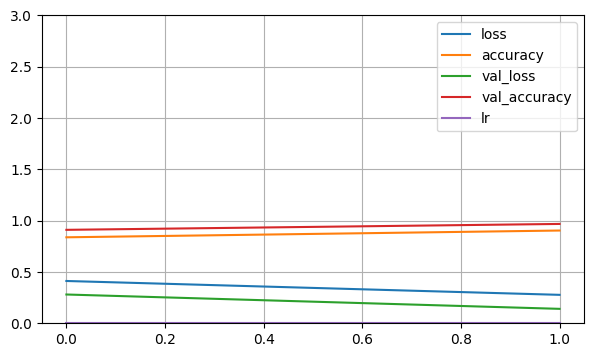

In [34]:
#plotting
pd.DataFrame(history.history).plot(figsize=(7, 4))
plt.grid(True)
plt.gca().set_ylim(0,3) #sumbu y

plt.show()

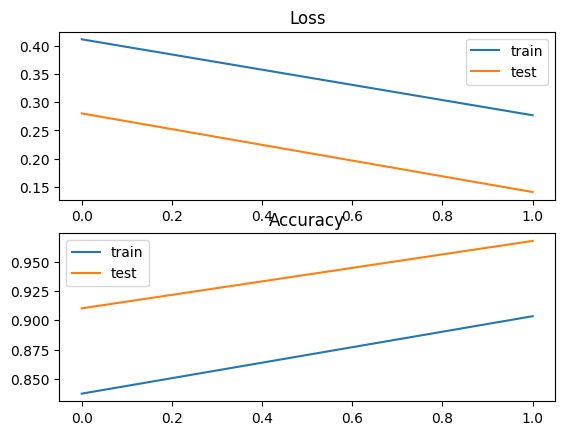

In [35]:
# plot loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
